In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import normalized_mutual_info_score

In [20]:
audio_df = pd.read_csv(r"aggregated_data\aggregated_audio\aggregated_audio_features.csv")
mean_main_df = pd.read_csv(r"aggregated_data\aggregated_main\mean_main_features.csv")

In [21]:
audio_df.columns

Index(['avg(num_followers)', 'avg(pid)', 'avg(avg(pid))',
       'avg(avg(num_followers))', 'avg(avg(acousticness))',
       'avg(avg(danceability))', 'avg(avg(duration_ms))', 'avg(avg(energy))',
       'avg(avg(instrumentalness))', 'avg(avg(key))', 'avg(avg(liveness))',
       'avg(avg(loudness))', 'avg(avg(mode))', 'avg(avg(speechiness))',
       'avg(avg(tempo))', 'avg(avg(valence))'],
      dtype='object')

In [22]:
audio_df['avg(num_followers)'] = audio_df['avg(num_followers)'].apply(lambda x: np.int64(x))
audio_df['quartile_group'] = pd.qcut(audio_df['avg(num_followers)'], q=[0, 0.25, 0.5, 0.75, 1], labels=['Q1', 'Q2', 'Q3', 'Q4'])

d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='avg(avg(tempo))', ylabel='avg(num_followers)'>

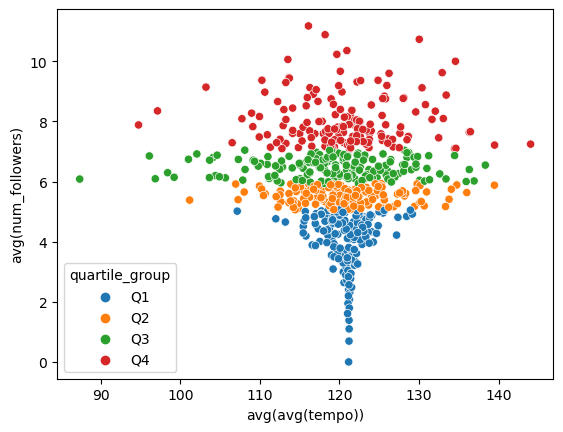

In [23]:
test_audio = audio_df.copy()
test_audio['avg(num_followers)'] = np.log(test_audio['avg(num_followers)'])
sns.scatterplot(data=test_audio,x="avg(avg(tempo))",y="avg(num_followers)",hue="quartile_group")

d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='avg(avg(duration_ms))', ylabel='avg(num_followers)'>

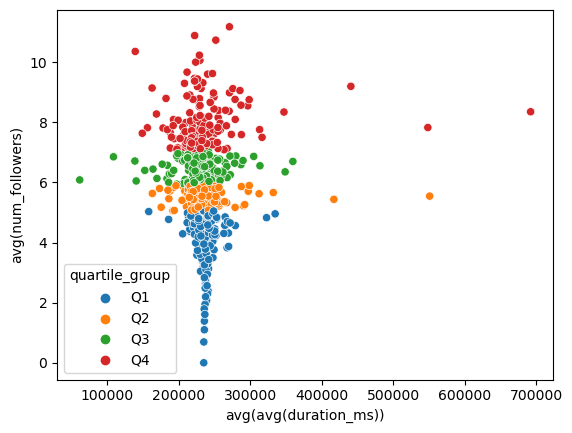

In [24]:
sns.scatterplot(data=test_audio,y="avg(num_followers)",hue="quartile_group",x="avg(avg(duration_ms))")

d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='avg(avg(acousticness))', ylabel='avg(num_followers)'>

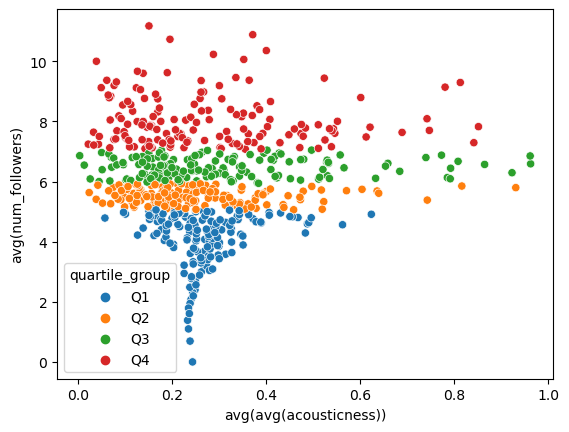

In [25]:
sns.scatterplot(data=test_audio,y="avg(num_followers)",hue="quartile_group",x="avg(avg(acousticness))")

d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='avg(avg(danceability))', ylabel='avg(num_followers)'>

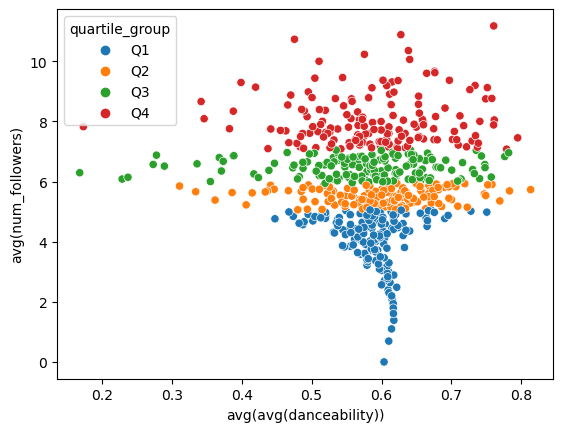

In [26]:
sns.scatterplot(data=test_audio,y="avg(num_followers)",hue="quartile_group",x="avg(avg(danceability))")

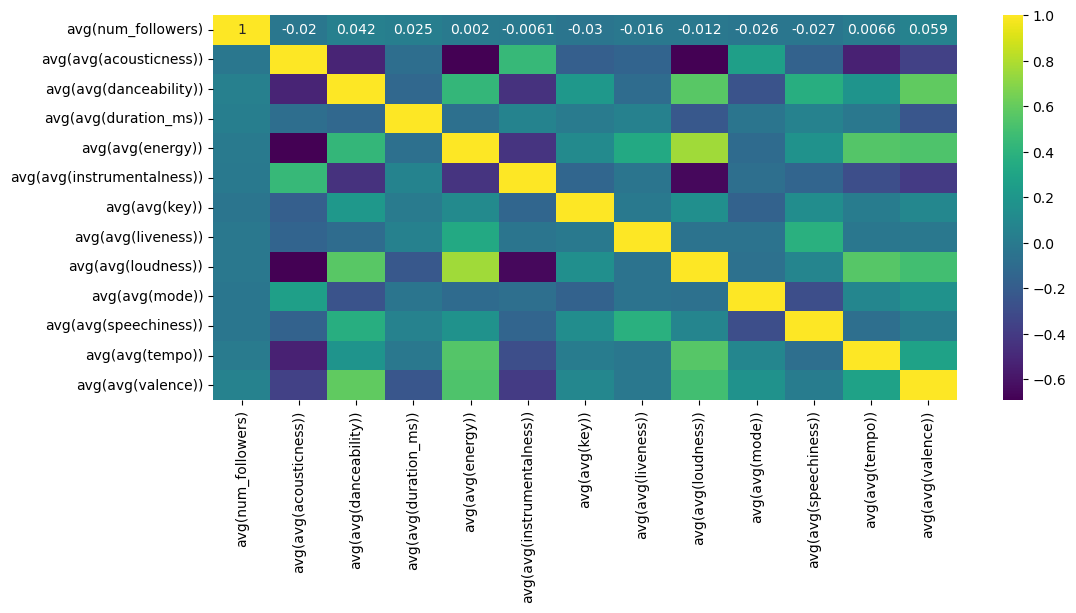

In [27]:
# Get correlation between audio features and num_followers
correlated_columns = audio_df.drop(['quartile_group','avg(avg(pid))','avg(avg(num_followers))','avg(pid)'],axis=1)
plt.figure(figsize=(12,5))
sns.heatmap(correlated_columns.corr(),robust=True,annot=True, cmap='viridis')
plt.show()

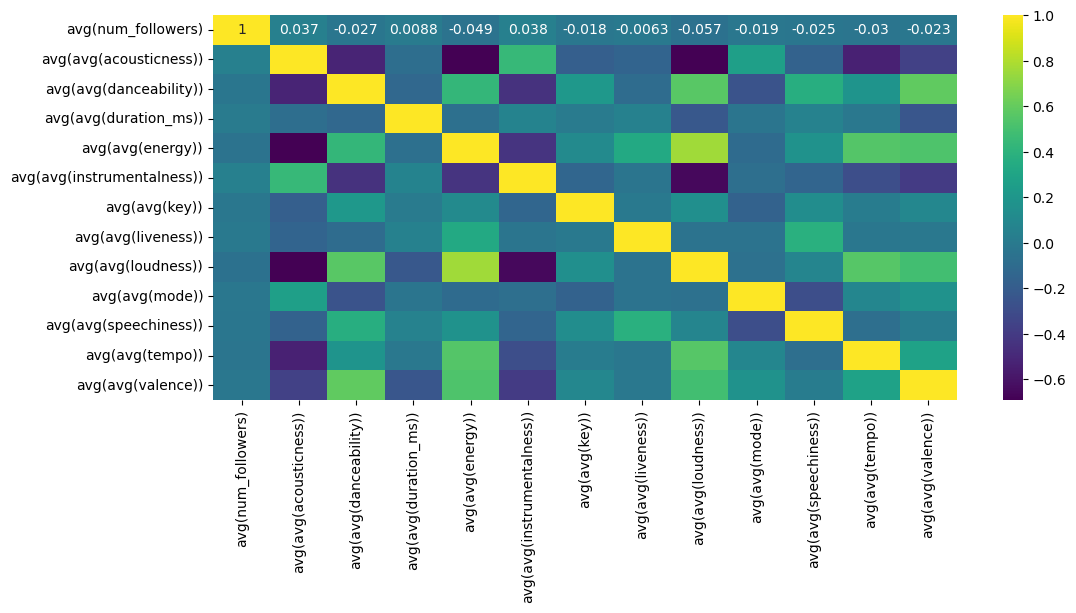

In [28]:
# Get correlation between audio features and logged(num_followers)
correlated_columns = test_audio.drop(['quartile_group','avg(avg(pid))','avg(avg(num_followers))','avg(pid)'],axis=1)
plt.figure(figsize=(12,5))
sns.heatmap(correlated_columns.corr(),robust=True,annot=True, cmap='viridis')
plt.show()

In [31]:
# with logged num_followers
mutual_info_regression(test_audio[['avg(avg(acousticness))',
       'avg(avg(danceability))', 'avg(avg(duration_ms))', 'avg(avg(energy))',
       'avg(avg(instrumentalness))', 'avg(avg(key))', 'avg(avg(liveness))',
       'avg(avg(loudness))', 'avg(avg(mode))', 'avg(avg(speechiness))',
       'avg(avg(tempo))', 'avg(avg(valence))']],test_audio['avg(num_followers)'])

array([0.16668661, 0.12088723, 0.08358248, 0.13551545, 0.20568556,
       0.13754787, 0.15085646, 0.12464527, 0.15648574, 0.17633147,
       0.11411833, 0.13478939])

In [ ]:
# without logged num_followers
mutual_info_regression(audio_df[['avg(avg(acousticness))',
       'avg(avg(danceability))', 'avg(avg(duration_ms))', 'avg(avg(energy))',
       'avg(avg(instrumentalness))', 'avg(avg(key))', 'avg(avg(liveness))',
       'avg(avg(loudness))', 'avg(avg(mode))', 'avg(avg(speechiness))',
       'avg(avg(tempo))', 'avg(avg(valence))']],audio_df['avg(num_followers)'])

# Main Features analysis

In [44]:
mean_main_df.columns

Index(['num_followers', 'mean_track_length', 'mean_num_artists',
       'mean_num_albums'],
      dtype='object')

In [45]:
mean_main_df['quartile_group'] = pd.qcut(mean_main_df['num_followers'], q=[0, 0.25, 0.5, 0.75, 1], labels=['Q1', 'Q2', 'Q3', 'Q4'])

In [46]:
mean_main_df['num_followers'] = np.log(mean_main_df['num_followers'])

d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='mean_track_length', ylabel='num_followers'>

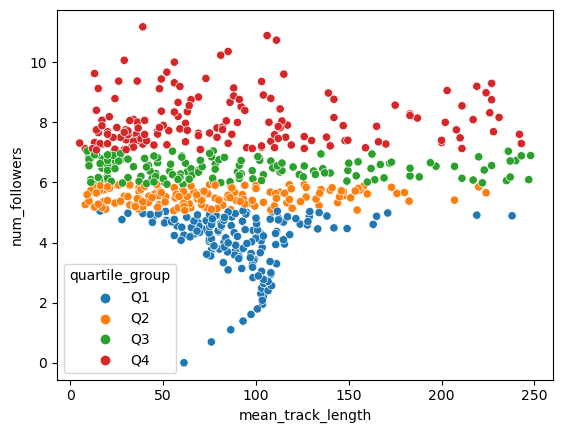

In [47]:
sns.scatterplot(data=mean_main_df,x="mean_track_length",y="num_followers",hue="quartile_group")

d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Anaconda\envs\sharp_env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='mean_num_artists', ylabel='num_followers'>

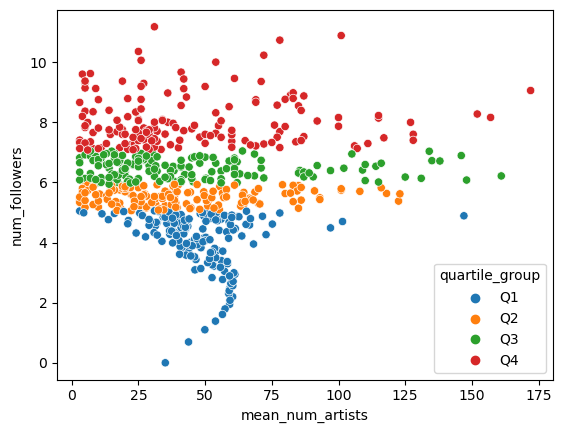

In [48]:
sns.scatterplot(data=mean_main_df,x="mean_num_artists",y="num_followers",hue="quartile_group")

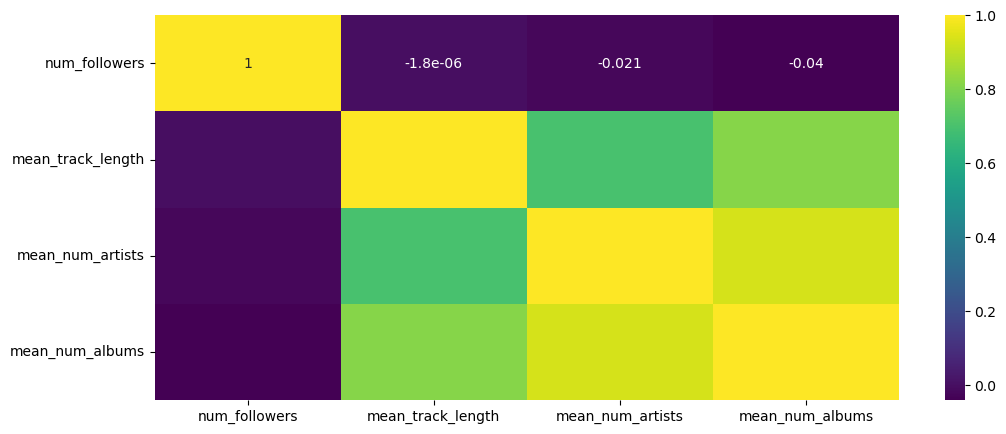

In [49]:
main_correlated_columns = mean_main_df.drop(['quartile_group'],axis=1)
plt.figure(figsize=(12,5))
sns.heatmap(main_correlated_columns.corr(),robust=True,annot=True, cmap='viridis')
plt.show()

In [35]:
# with logged num_followers
mutual_info_regression(mean_main_df[['mean_track_length', 'mean_num_artists',
       'mean_num_albums']],mean_main_df['num_followers'])

array([0.13026319, 0.13489316, 0.11449277])